#### HW4 Problem 4
## Name: Vibhav Jha

# Training section

### Training imports

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
from sklearn import preprocessing
import pandas as pd
from joblib import dump

In [2]:
df = pd.read_csv('training_Dataset.csv')
df.diagnosis.replace({"M":1,"B":0},inplace=True) #replace with integers

dfsc = pd.DataFrame(preprocessing.scale(df.iloc[:,2:32]))
#i tried both minmaxscaler and standardscaler which kept getting me perfect classifications
#so instead i used this "leaky method" as is mentioned in the documentation

#there was no actual method (like kfolds, correlation analysis etc.) to feature selection, I just chose a few
#subsets at random and was able to achieve the required sensitivities/specificities

xtrain = dfsc.iloc[:,2:15] #selecting a subset of features
ytrain = df['diagnosis'] #labels

clf = SVC()
clf.fit(xtrain,ytrain)
ypred = clf.fit(xtrain, ytrain).predict(xtrain)


dump(clf, 'VJHA_SVM_model.joblib')

['VJHA_SVM_model.joblib']

### Performance and confusion matrix

Train Sensitivity: 0.9038461538461539
Train Specificity: 0.9923954372623575


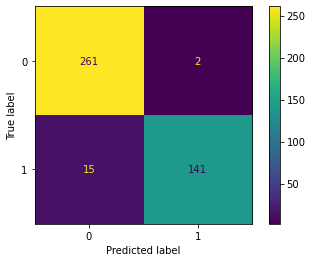

In [3]:
cm = confusion_matrix(ytrain,ypred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

#Sensitivity = TP/(TP + FN) and Specificity = TN/(TN + FP).
tn, fp, fn, tp = confusion_matrix(ytrain, ypred).ravel()
sensitivity = tp/(tp+fn)
print('Train Sensitivity:', sensitivity)
specificity = tn/(tn+fp)
print('Train Specificity:', specificity)

# Testing section

### Testing imports

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
from sklearn import preprocessing
import pandas as pd
from joblib import load

### Testing

In [5]:
dft = pd.read_csv('testing_Dataset.csv')
#use same preprocessing method as earlier
dft.diagnosis.replace({"M":1,"B":0},inplace=True)

dftsc = pd.DataFrame(preprocessing.scale(dft.iloc[:,2:32]))

xtest = dftsc.iloc[:,2:15] #select same subset as training
ytest = dft['diagnosis']


clf_loaded = load('VJHA_SVM_model.joblib')
ypred3 = clf_loaded.predict(xtest)

### Performance and confusion matrix

Test Sensitivity: 0.9107142857142857
Test Specificity: 1.0


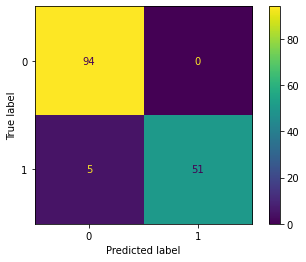

In [6]:
cm2 = confusion_matrix(ytest,ypred3)
ConfusionMatrixDisplay(confusion_matrix = cm2).plot()

#Sensitivity = TP/(TP + FN) and Specificity = TN/(TN + FP)
tn, fp, fn, tp = confusion_matrix(ytest, ypred3).ravel()
sensitivity = tp/(tp+fn)
print('Test Sensitivity:', sensitivity)
specificity = tn/(tn+fp)
print('Test Specificity:', specificity)